In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_met
import glob
import metpy
from metpy import calc
from metpy.units import units
from scipy import stats
import metpy
from metpy import calc
from metpy.units import units
import pickle as pkl

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
dry_test3 = xr.open_dataarray('/media/ck/Elements/SouthAmerica/CHIRPS/dry_spells_1mm_3-7days.nc')
wet_test3 = xr.open_dataarray('/media/ck/Elements/SouthAmerica/CHIRPS/wet_spells_1mm_3-7days.nc')
dry_test2 = xr.open_dataarray('/media/ck/Elements/SouthAmerica/CHIRPS/dry_spells_1mm_3-7days_perPix.nc') # don't use per pix, correlation period not masked
wet_test2 = xr.open_dataarray('/media/ck/Elements/SouthAmerica/CHIRPS/wet_spells_1mm_3-7days_perPix.nc')
dry_test = xr.open_dataarray('/media/ck/Elements/SouthAmerica/CHIRPS/dry_spells_1mm_3-4_5-6_7-8_days_StartOfSpell.nc') #use this
wet_test = xr.open_dataarray('/media/ck/Elements/SouthAmerica/CHIRPS/wet_spells_1mm_3-4_5-6_7-8_days_StartOfSpell.nc')
dry_test.name = 'dry'
wet_test.name = 'wet'

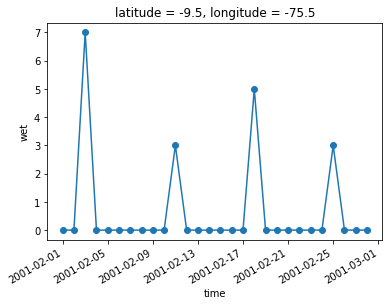

In [40]:
wet_test.sel(latitude=-9.5, longitude=-75.5, method='nearest').sel(time='2001-02').plot(marker='o')


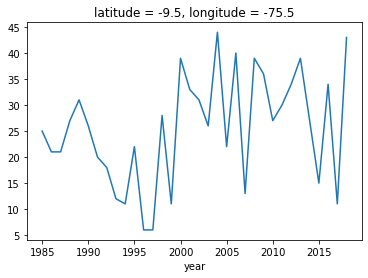

In [46]:
wet_test3.where(wet_test3==5).sel(latitude=-9.5, longitude=-75.5, method='nearest').groupby('time.year').count().plot()

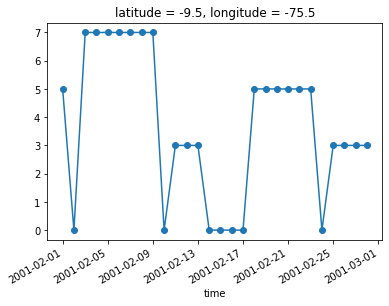

In [11]:
wet_test3.sel(latitude=-9.5, longitude=-75.5, method='nearest').sel(time='2001-02').plot(marker='o')
#wet_test3.mean('time').plot()#.sel(time='2001').plot(marker='o')

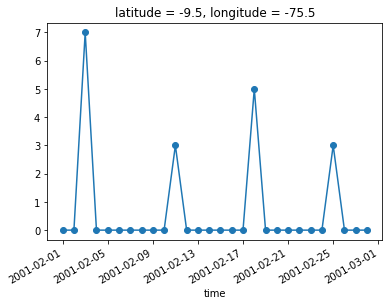

In [12]:
wet_test2.sel(latitude=-9.5, longitude=-75.5, method='nearest').sel(time='2001-02').plot(marker='o')


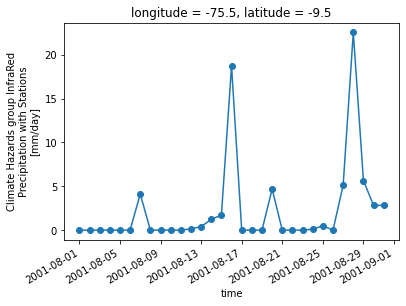

In [58]:
ch_on_era = xr.open_mfdataset('/media/ck/Elements/SouthAmerica/CHIRPS/SA_daily_onERA/CHIRPS_daily_onERA_*.nc')
ch_on_era['precip'].sel(latitude=-9.5, longitude=-75.5, method='nearest').sel(time='2001-08').plot(marker='o')

In [44]:
wet_test

<xarray.DataArray 'wet' (time: 12418, latitude: 101, longitude: 65)>
[81524170 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1985-01-01 1985-01-02 ... 2018-12-31
  * latitude   (latitude) float32 -25.0 -24.75 -24.5 -24.25 ... -0.5 -0.25 0.0
  * longitude  (longitude) float32 -81.0 -80.75 -80.5 ... -65.5 -65.25 -65.0

In [45]:
regions = {
'equatorial' : [(-5,0)],
'transition' : [(-8,-5)],
'central' : [(-12,-8)],
'southern' : [(-18,-14)]}
h = 2000

In [46]:
height = xr.open_dataset('/media/ck/Elements/SouthAmerica/ERA5/hourly/topo_ERA5_peru.nc')

In [47]:
dummy = xr.open_dataset(glob.glob('/media/ck/Elements/SouthAmerica/ERA5/hourly/peru/pressure_levels/*.nc')[0]).isel(time=0, level=0)
dummy = uda.flip_lat(dummy)

In [48]:
dry = dummy.salem.transform(dry_test, interp='nearest').where(height>=h)
wet = dummy.salem.transform(wet_test, interp='nearest').where(height>=h)

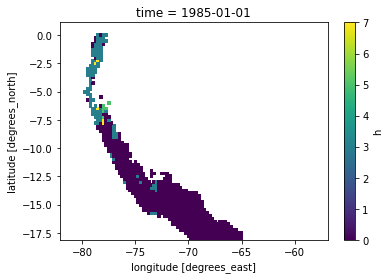

In [49]:
dry['h'].isel(time=0).plot()

In [58]:
maxlon = height.argmax(dim='longitude')

In [59]:
picklon = height.longitude[maxlon['h']]

In [60]:
picklon

<xarray.DataArray 'longitude' (latitude: 77)>
array([-69.  , -69.5 , -69.75, -70.  , -70.  , -70.  , -70.25, -70.25, -71.  ,
       -71.5 , -70.75, -71.  , -69.25, -69.25, -72.5 , -70.25, -70.75, -71.  ,
       -75.  , -74.75, -75.25, -75.5 , -75.5 , -76.  , -76.  , -75.  , -76.25,
       -76.5 , -76.5 , -76.  , -76.  , -77.  , -77.  , -77.25, -77.25, -77.5 ,
       -77.5 , -77.75, -77.75, -77.75, -78.  , -77.5 , -77.5 , -78.25, -78.5 ,
       -78.5 , -78.5 , -79.25, -77.5 , -79.25, -79.25, -79.5 , -79.5 , -79.5 ,
       -79.25, -79.  , -79.25, -79.25, -79.5 , -79.  , -79.25, -79.25, -78.75,
       -78.5 , -78.5 , -78.5 , -78.75, -78.75, -78.75, -78.5 , -78.25, -78.25,
       -78.  , -78.  , -77.75, -78.  , -77.75], dtype=float32)
Coordinates:
    longitude  (latitude) float32 -69.0 -69.5 -69.75 ... -77.75 -78.0 -77.75
  * latitude   (latitude) float32 -18.0 -17.75 -17.5 -17.25 ... 0.5 0.75 1.0
Attributes:
    units:      degrees_east
    long_name:  longitude

In [61]:
longrid = np.repeat(np.expand_dims(picklon.values,axis=1), height.longitude.shape, axis=1)
lontrue = np.repeat(np.expand_dims(dry.longitude.values,axis=0), dry.latitude.shape, axis=0)

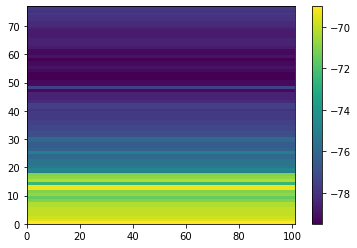

In [62]:
plt.pcolormesh(longrid)
plt.colorbar()

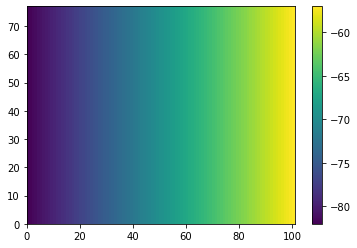

In [63]:
plt.pcolormesh(lontrue)
plt.colorbar()

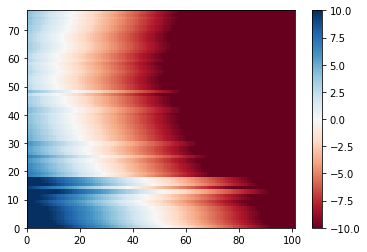

In [64]:
plt.pcolormesh(longrid-lontrue, cmap='RdBu', vmin=-10, vmax=10)
plt.colorbar()

In [65]:
western = (longrid-lontrue)>0
eastern = (longrid-lontrue)<0

In [66]:
num_pix = {}
for rr in regions.keys():
    print(rr)
    als = regions[rr]
    dd = dry['h'].isel(time=5).sel(latitude=slice(als[0][0], als[0][1]))
    vals = dd.where(np.isfinite(dd)).count(['latitude', 'longitude']).values
    print(vals)
    num_pix[rr] =  vals

equatorial
69
transition
58
central
132
southern
377


In [67]:
def get_spells(region, spell_ds,spell_length, equal=None, gt=None, lt=None, perc=0.15, divide=None):
     
    alls = regions[region]
    
    #times = spell_ds.time

    
    mask = 0
    if gt is not None:
        mask = spell_ds > spell_length
    if equal is not None:
        mask = spell_ds == spell_length
    if lt is not None:
        mask = (spell_ds > 3) & (spell_ds <= spell_length)
        
    if divide is not None:
        mask = mask & divide
    
    #ipdb.set_trace()
#     dry_region = spell_ds['h'].sel(latitude=slice(alls[0][0], alls[0][1])).where(mask).count('longitude').squeeze()
#     dry_region_all = spell_ds['h'].sel(latitude=slice(alls[0][0], alls[0][1])).where(np.isfinite(spell_ds)).count('longitude').squeeze()
#     #ipdb.set_trace()
#     dry_dates = dry_region.where((dry_region.mean(['latitude'])/dry_region_all.mean(['latitude'])>0.25), drop=True)  # fraction covered by spell, 0.25 means 25% of pixels on day

    dry_region = spell_ds['h'].sel(latitude=slice(alls[0][0], alls[0][1])).where(mask).count(['longitude','latitude']).squeeze()
    dry_region_all = spell_ds['h'].sel(latitude=slice(alls[0][0], alls[0][1])).where(np.isfinite(spell_ds)).count(['longitude', 'latitude']).squeeze()
    #ipdb.set_trace()
    dry_dates = dry_region.where((dry_region/dry_region_all)>perc, drop=True)  # fraction covered by spell, 0.25 means 25% of pixels on day
    
    
    
#     dry_region_area = spell_ds['h'].sel(latitude=slice(alls[0][0], alls[0][1])).where(mask).count(['latitude', 'longitude']).squeeze()
#     dry_dates = dry_region_area.where(dry_region_area>=50, drop=True)
    #ipdb.set_trace()
    #plt.plot(dry_region_area['h'])

    drydates = []
    #ipdb.set_trace()
    for dryd in dry_dates.time:
            drydates.append(pd.Timestamp(dryd.values))
    out = pd.to_datetime(drydates)
    
    print('Len', len(out))
    
    return pd.to_datetime(drydates)

In [70]:
for pr in ['equatorial', 'transition', 'central','southern']:  # 
    
    perc=0.20
    side=None
    
    drydates = get_spells(pr, dry,3, equal=True, perc=perc, divide=side)  # 3 includes 3-4 (from spell map)
    wetdates = get_spells(pr, wet,3, equal=True, perc=perc, divide=side)
    drydates5 = get_spells(pr, dry,5,equal=True, perc=perc, divide=side)# 5 includes 5-6 (from spell map)
    wetdates5 = get_spells(pr, wet,5,equal=True, perc=perc, divide=side)
    drydates7 = get_spells(pr, dry,7,equal=True, perc=perc, divide=side)# 7 includes 7 or more (from spell map)
    wetdates7 = get_spells(pr, wet,7,equal=True, perc=perc, divide=side)
    
    dic = {
    'dry3' : drydates,
    'wet3' : wetdates,
    'dry5' : drydates5,
    'wet5' : wetdates5,
    'dry7' : drydates7,
    'wet7' : wetdates7,
       }
    pkl.dump(dic, open("/home/ck/DIR/cornkle/data/HUARAZ/saves/"+pr+"_dw_spellDates_"+str(perc)+"perc_3-4_5-6_7-8_StartOfSpell.p", "wb"))

Len 415
Len 262
Len 160
Len 42
Len 85
Len 11
Len 366
Len 244
Len 150
Len 39
Len 76
Len 10
Len 189
Len 231
Len 55
Len 32
Len 13
Len 10
Len 35
Len 16
Len 3
Len 4
Len 5
Len 1


In [6]:
allreg_dry = []
allreg_wet = []

for pr in ['equatorial', 'transition', 'central','southern']:
    dic = pkl.load(open("/home/ck/DIR/cornkle/data/HUARAZ/saves/"+pr+"_dw_spellDates_0.15perc_v2.p", "rb"))
    #dic = pkl.load(open("/home/ck/DIR/cornkle/data/HUARAZ/saves/"+pr+"_dw_spellDates_0.15perc_3-4_5-6_7-8_StartOfSpell.p", "rb"))
    dry = dic['dry7'].month
    wet = dic['wet7'].month
    
    allreg_dry.append(dry.values)
    allreg_wet.append(wet.values)

In [7]:
import seaborn as sns
colord = sns.color_palette("magma_r")

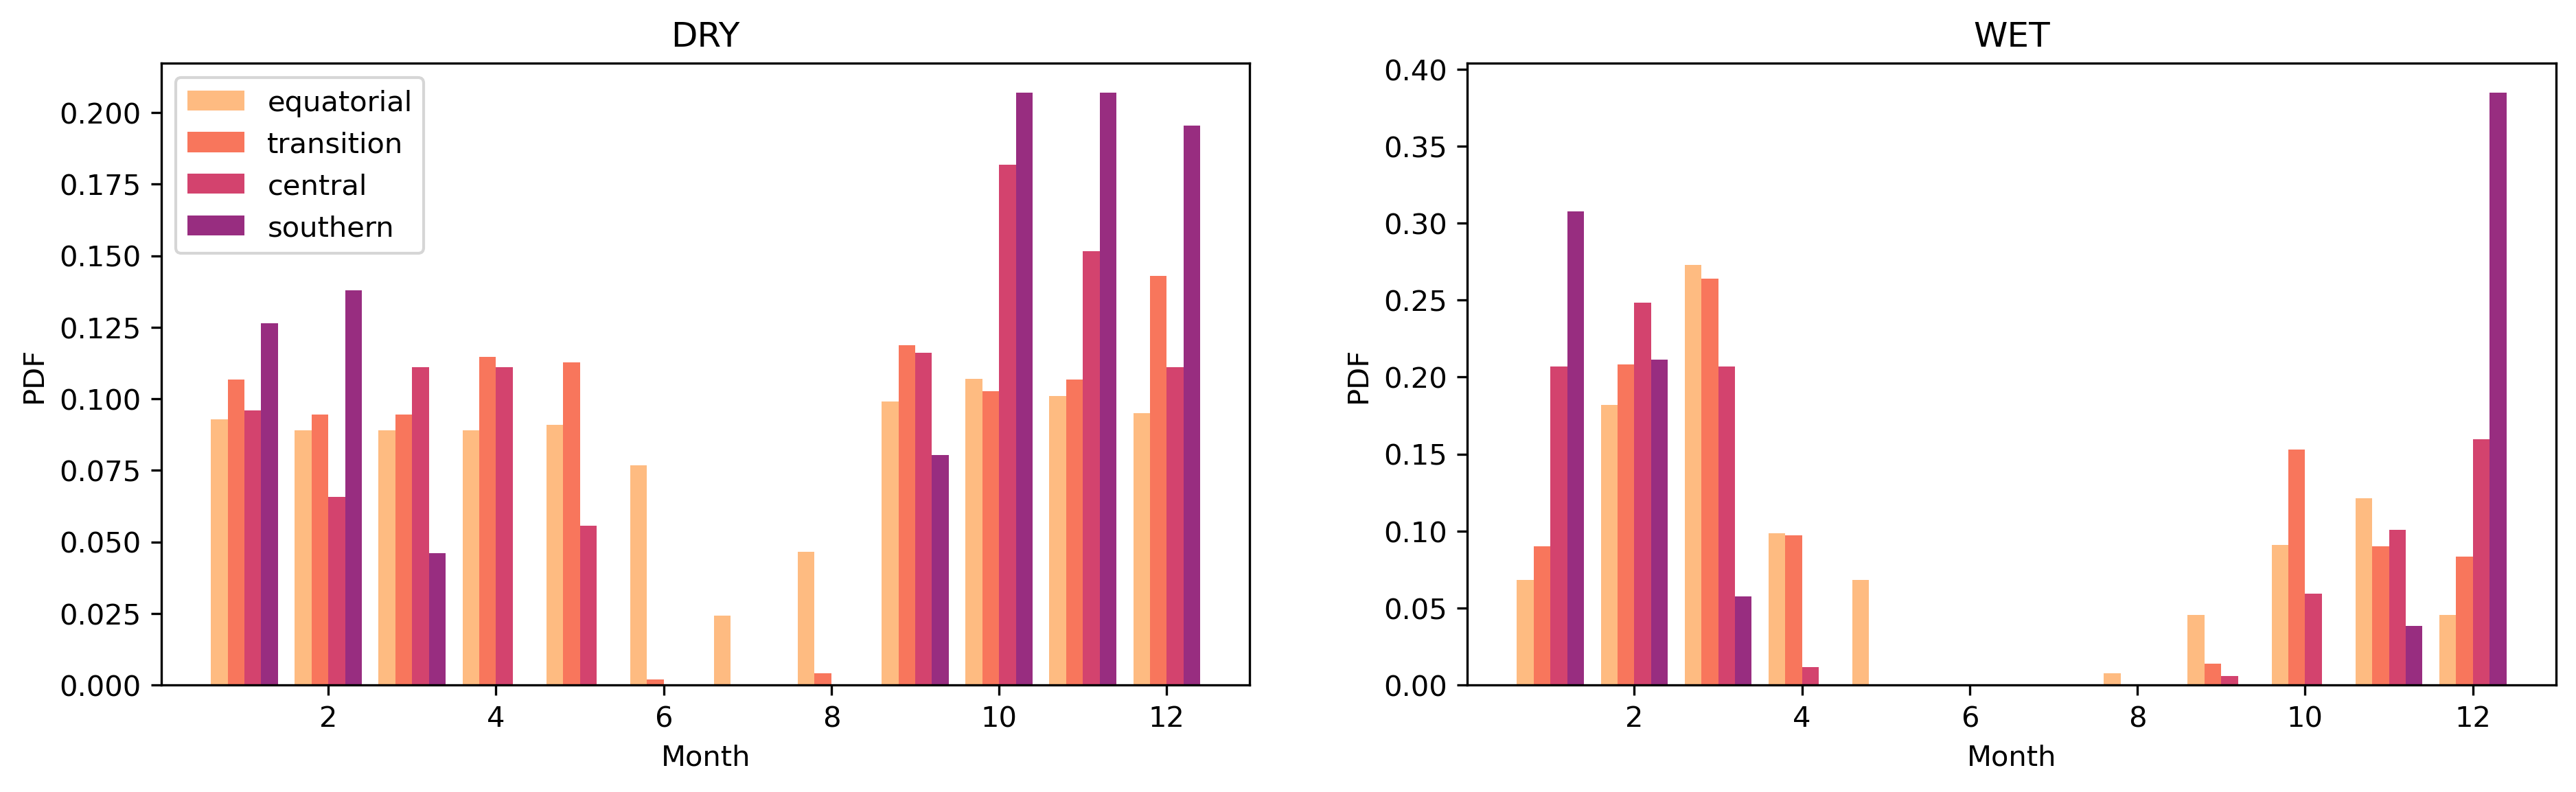

In [8]:
f = plt.figure(figsize=(15,4), dpi=300)
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
colors = [colord[0], colord[1], colord[2], colord[3]]
label = ['equatorial', 'transition', 'central','southern']

ax.hist(allreg_dry, np.arange(1,14)-0.5, histtype='bar', color=colors, label=label, density=True)
ax.legend()
ax.set_title('DRY')

ax1.hist(allreg_wet, np.arange(1,14)-0.5, histtype='bar', color=colors, density=True)
ax1.set_title('WET')

ax.set_xlabel('Month')
ax1.set_xlabel('Month')

ax.set_ylabel('PDF')
ax1.set_ylabel('PDF')

f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/paper/supp_drywet_distributionMonthv2_7day.jpg')

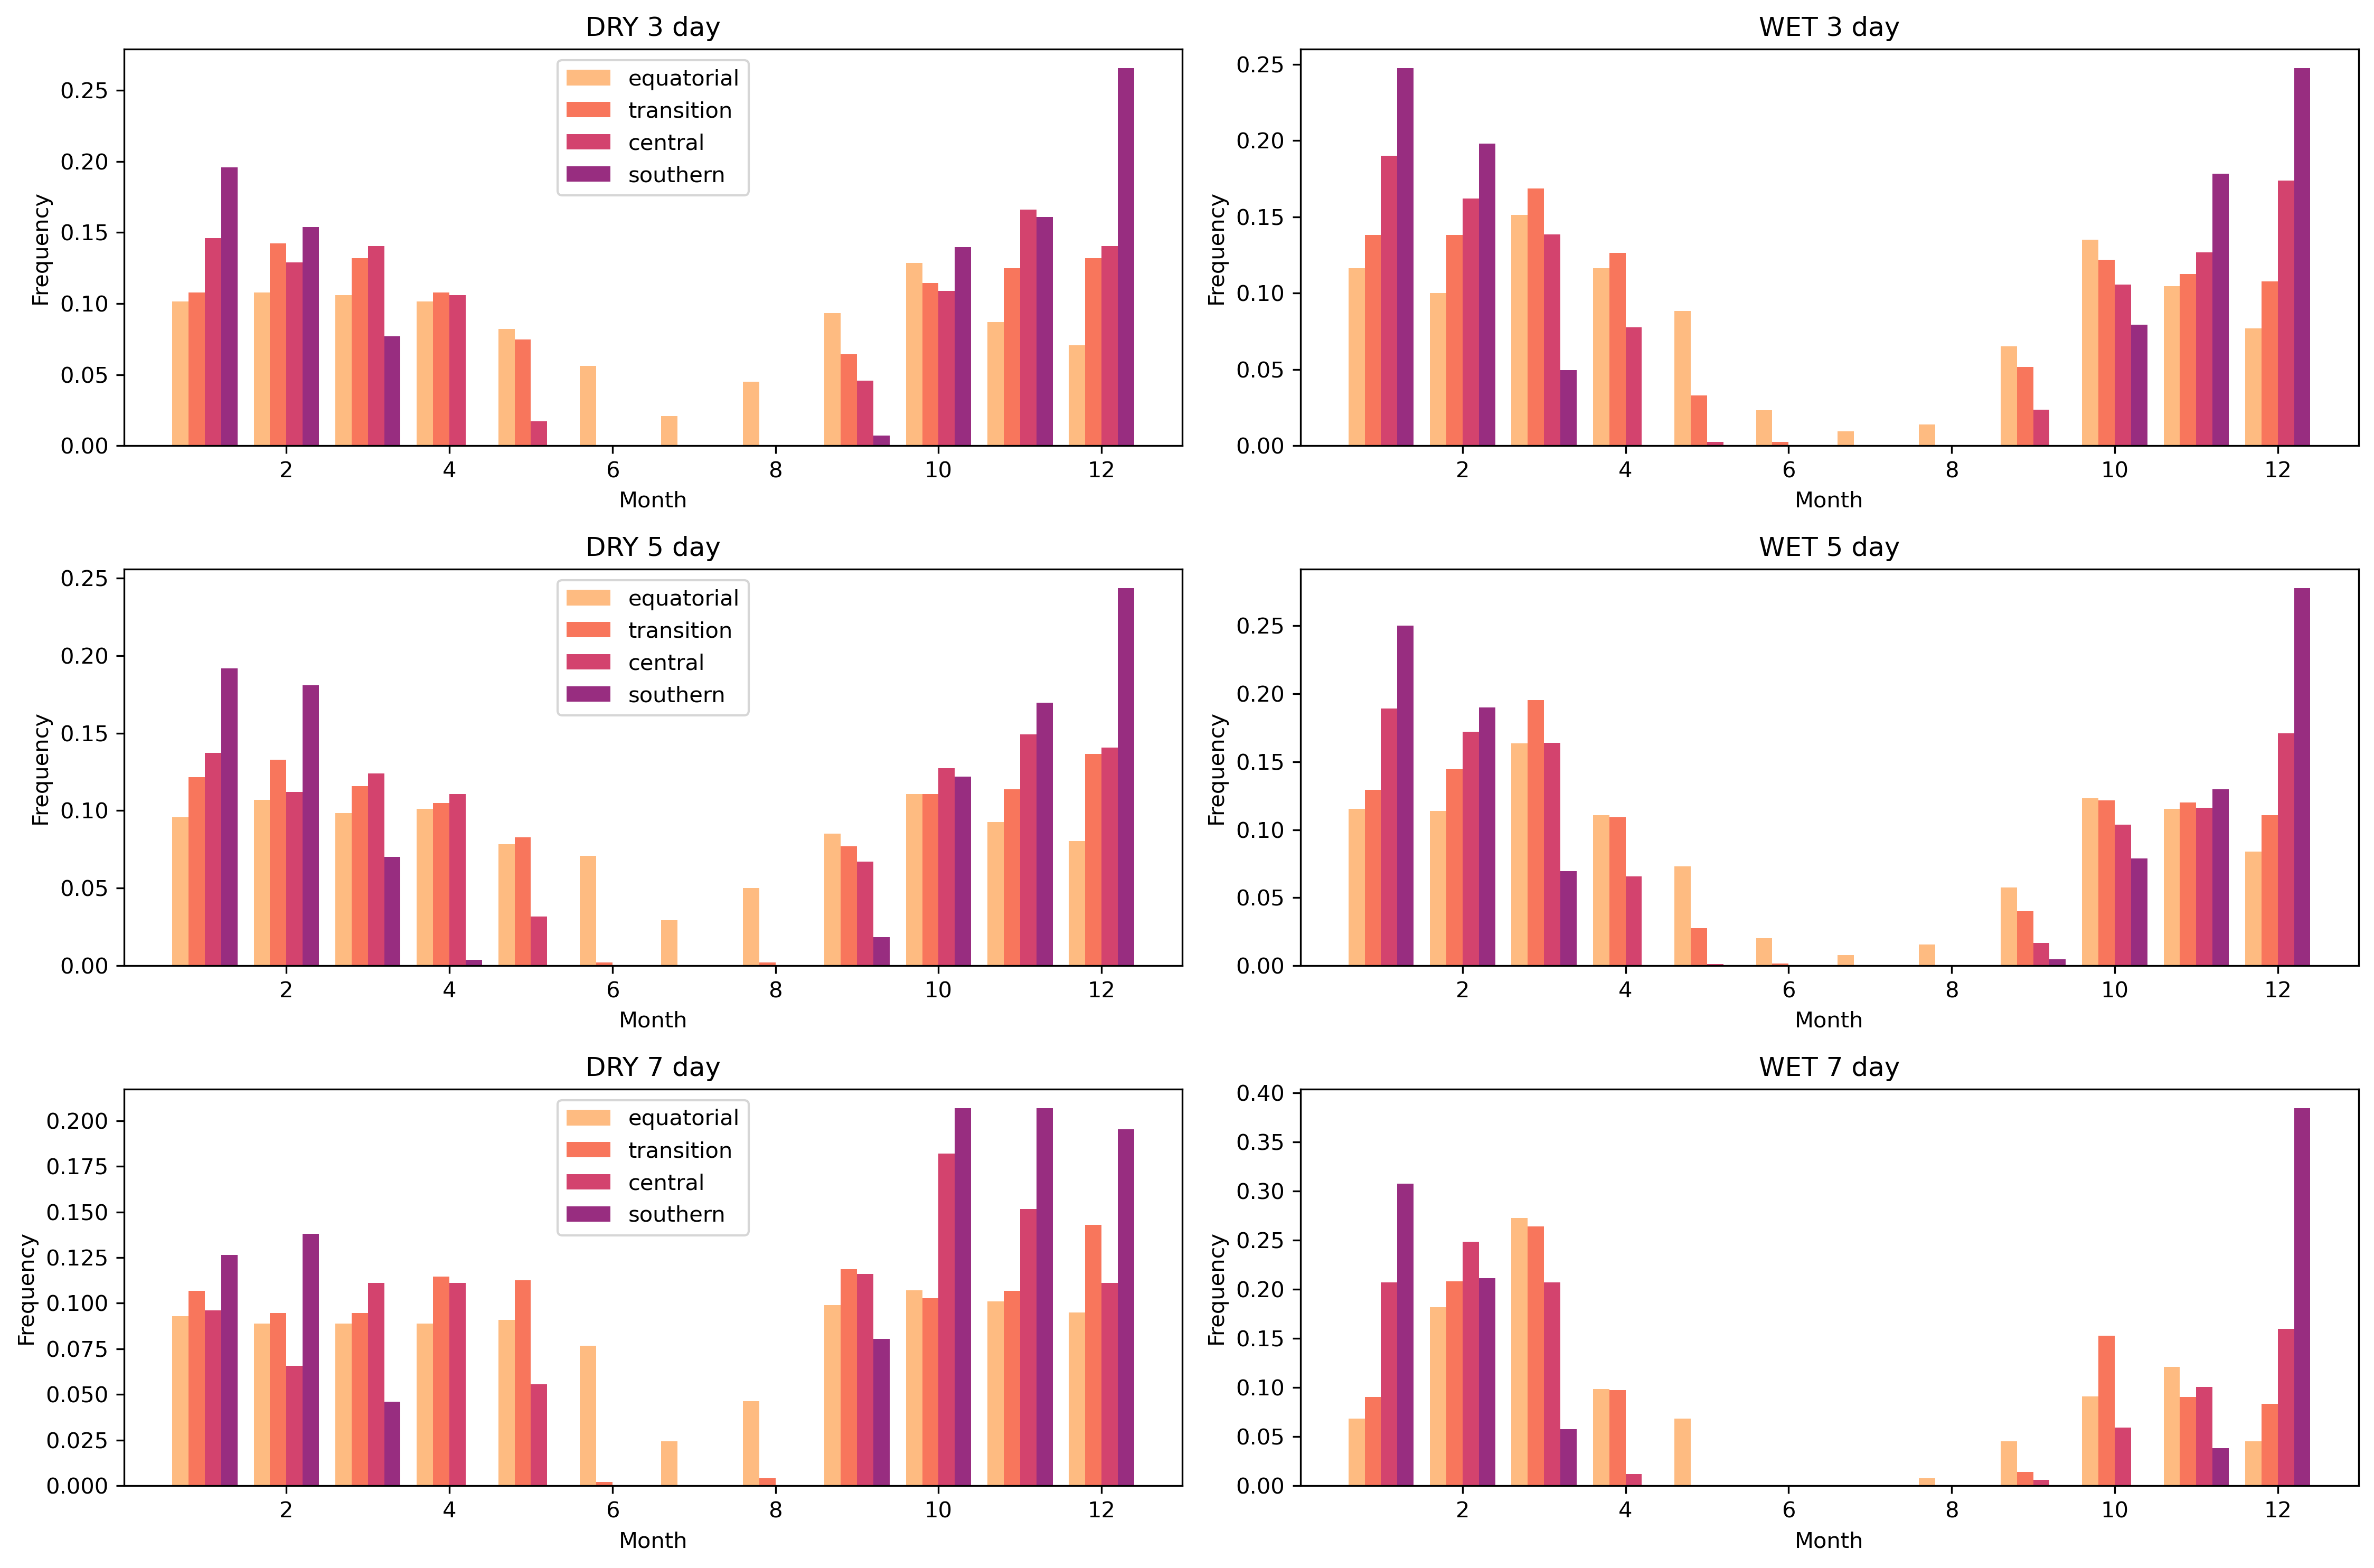

In [12]:
f = plt.figure(figsize=(15,10), dpi=300)

ttags = ['3 day', '5 day', '7 day']

for ids, spell in enumerate([3,5,7]):
    
    

    allreg_dry = []
    allreg_wet = []

    for pr in ['equatorial', 'transition', 'central','southern']:
        dic = pkl.load(open("/home/ck/DIR/cornkle/data/HUARAZ/saves/"+pr+"_dw_spellDates_0.15perc_v2.p", "rb"))
        #dic = pkl.load(open("/home/ck/DIR/cornkle/data/HUARAZ/saves/"+pr+"_dw_spellDates_0.15perc_3-4_5-6_7-8_StartOfSpell.p", "rb"))
        dry = dic['dry'+str(spell)].month
        wet = dic['wet'+str(spell)].month

        allreg_dry.append(dry.values)
        allreg_wet.append(wet.values)
        
    ax = f.add_subplot(3,2,ids*2+1)
    ax1 = f.add_subplot(3,2,ids*2+2)
    colors = [colord[0], colord[1], colord[2], colord[3]]
    label = ['equatorial', 'transition', 'central','southern']

    ax.hist(allreg_dry, np.arange(1,14)-0.5, histtype='bar', color=colors, label=label, density=True)
    ax.legend()
    ax.set_title('DRY '+ttags[ids])

    ax1.hist(allreg_wet, np.arange(1,14)-0.5, histtype='bar', color=colors, density=True)
    ax1.set_title('WET '+ttags[ids])

    ax.set_xlabel('Month')
    ax1.set_xlabel('Month')

    ax.set_ylabel('Frequency')
    ax1.set_ylabel('Frequency')
plt.tight_layout()
f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/paper/seasonal_cycle_spellFreq_histo.jpg')

In [6]:
allreg_dry3 = []
allreg_wet3 = []

allreg_dry7 = []
allreg_wet7 = []


allreg_dry5 = []
allreg_wet5 = []

for pr in ['equatorial', 'transition', 'central','southern']:
    dic = pkl.load(open("/home/ck/DIR/cornkle/data/HUARAZ/saves/"+pr+"_dw_spellDates_0.15perc_v2.p", "rb"))
    dry = dic['dry5'].year
    wet = dic['wet5'].year
    
    allreg_dry5.append(dry.values)
    allreg_wet5.append(wet.values)
    
    
    dry = dic['dry3'].year
    wet = dic['wet3'].year
    
    allreg_dry3.append(dry.values)
    allreg_wet3.append(wet.values)
    
    
    dry = dic['dry7'].year
    wet = dic['wet7'].year
    
    allreg_dry7.append(dry.values)
    allreg_wet7.append(wet.values)

In [26]:
allreg_dry

[array([1985, 1985, 1985, ..., 2018, 2018, 2018]),
 array([1985, 1985, 1985, ..., 2018, 2018, 2018]),
 array([1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985,
        1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986, 1986, 1986, 1986,
        1986, 1986, 1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1987,
        1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
        1987, 1987, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988,
        1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988,
        1988, 1988, 1988, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
        1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
        1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
        1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
        1990, 1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
        1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
        19

Text(0, 0.5, 'PDF')

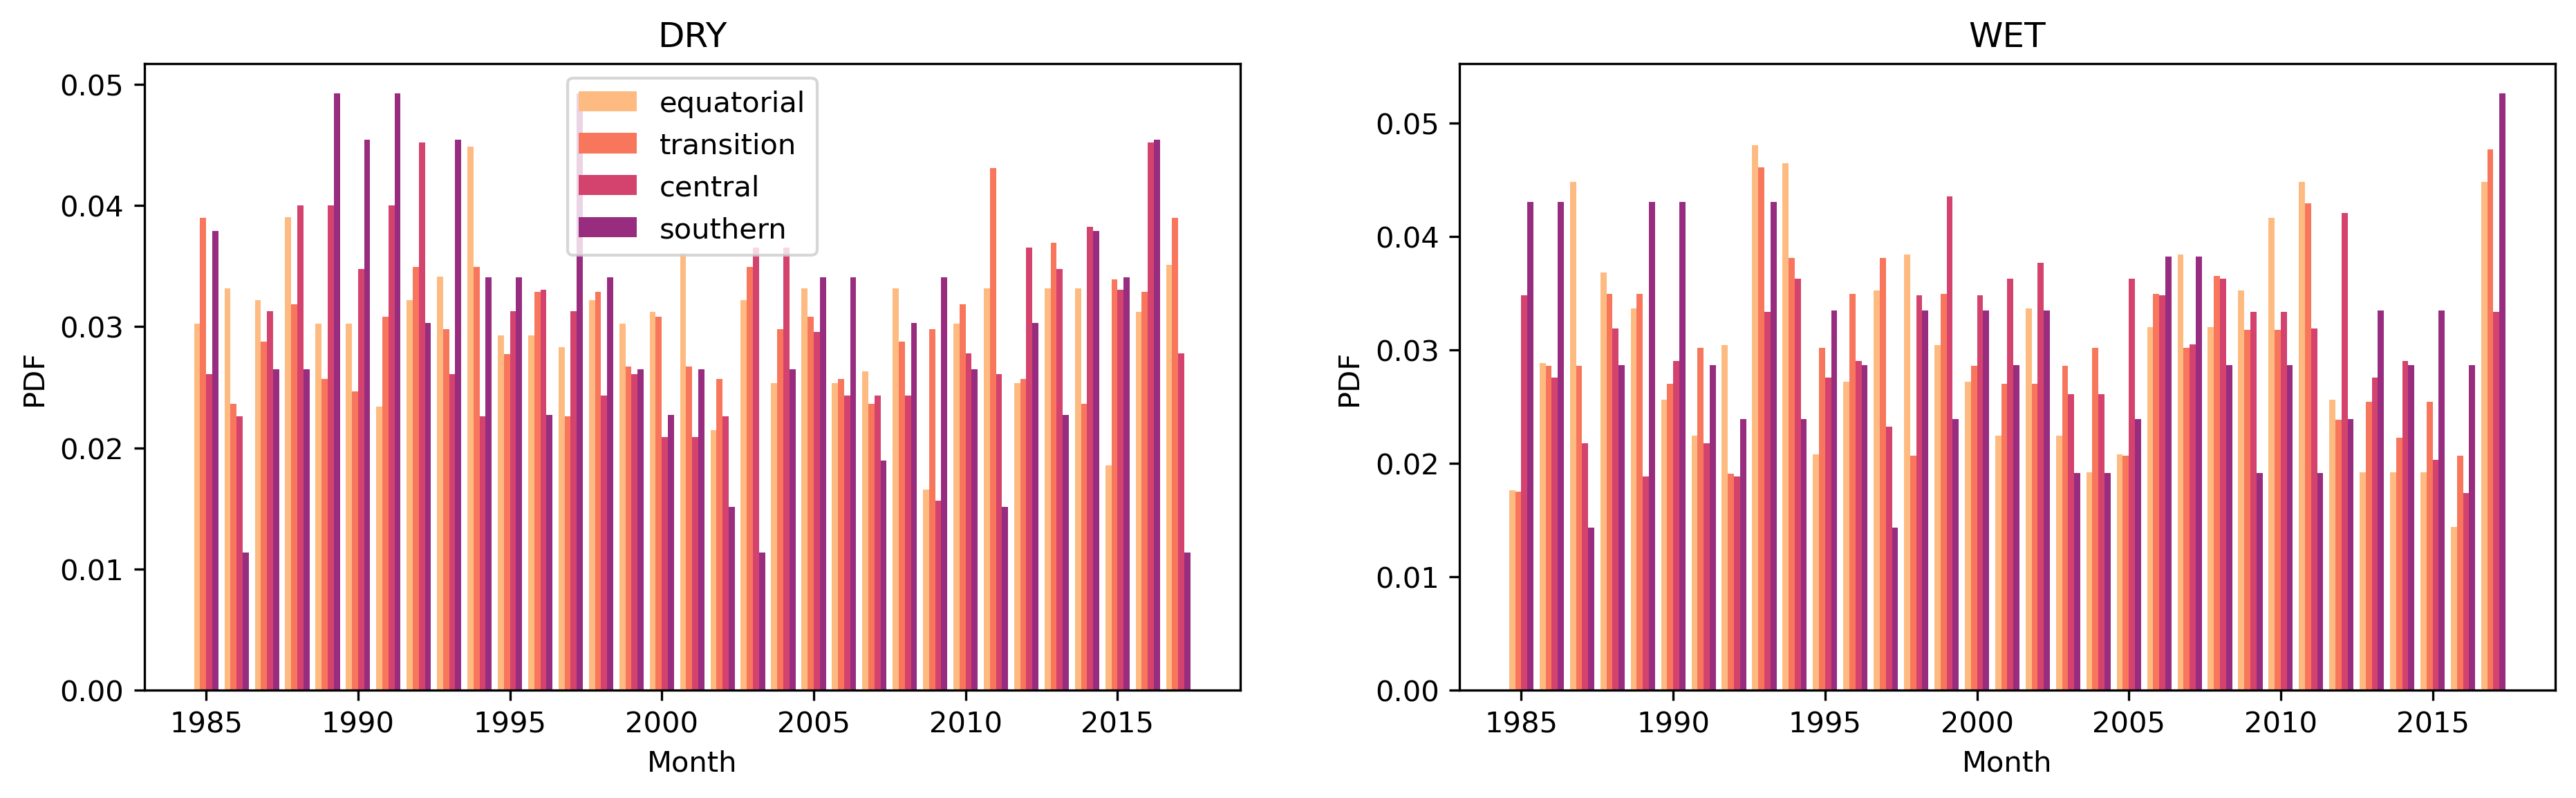

In [10]:
f = plt.figure(figsize=(15,4), dpi=300)
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
colors = [colord[0], colord[1], colord[2], colord[3]]
label = ['equatorial', 'transition', 'central','southern']

ax.hist(allreg_dry, np.unique(allreg_dry[0])-0.5, histtype='bar', color=colors, label=label, density=True)
ax.legend()
ax.set_title('DRY')

ax1.hist(allreg_wet, np.unique(allreg_dry[0])-0.5, histtype='bar', color=colors, density=True)
ax1.set_title('WET')

ax.set_xlabel('Month')
ax1.set_xlabel('Month')

ax.set_ylabel('PDF')
ax1.set_ylabel('PDF')

0
0.004575505421267066
signif.
0.13984768017512983
0.9039128781744807
1
0.23265545894112866
0.003139641772599769
signif.
0.23563877638484493
2
0.12214202630126055
0.4982422610752708
0.3979656792119739
3
0.13790797765266946
0.601715962793383
0.015222721635126887
signif.
4
0.0030773724297687563
signif.
0.10026299908202943
0.5612965094038368
5
0.021674802539092874
signif.
0.6156093972885467
0.13061421387986377
6
0.9651817988382776
0.28156239695156043
0.14810658083256178
7
0.22599087791054648
0.011145508269979383
signif.
0.8733602872525983


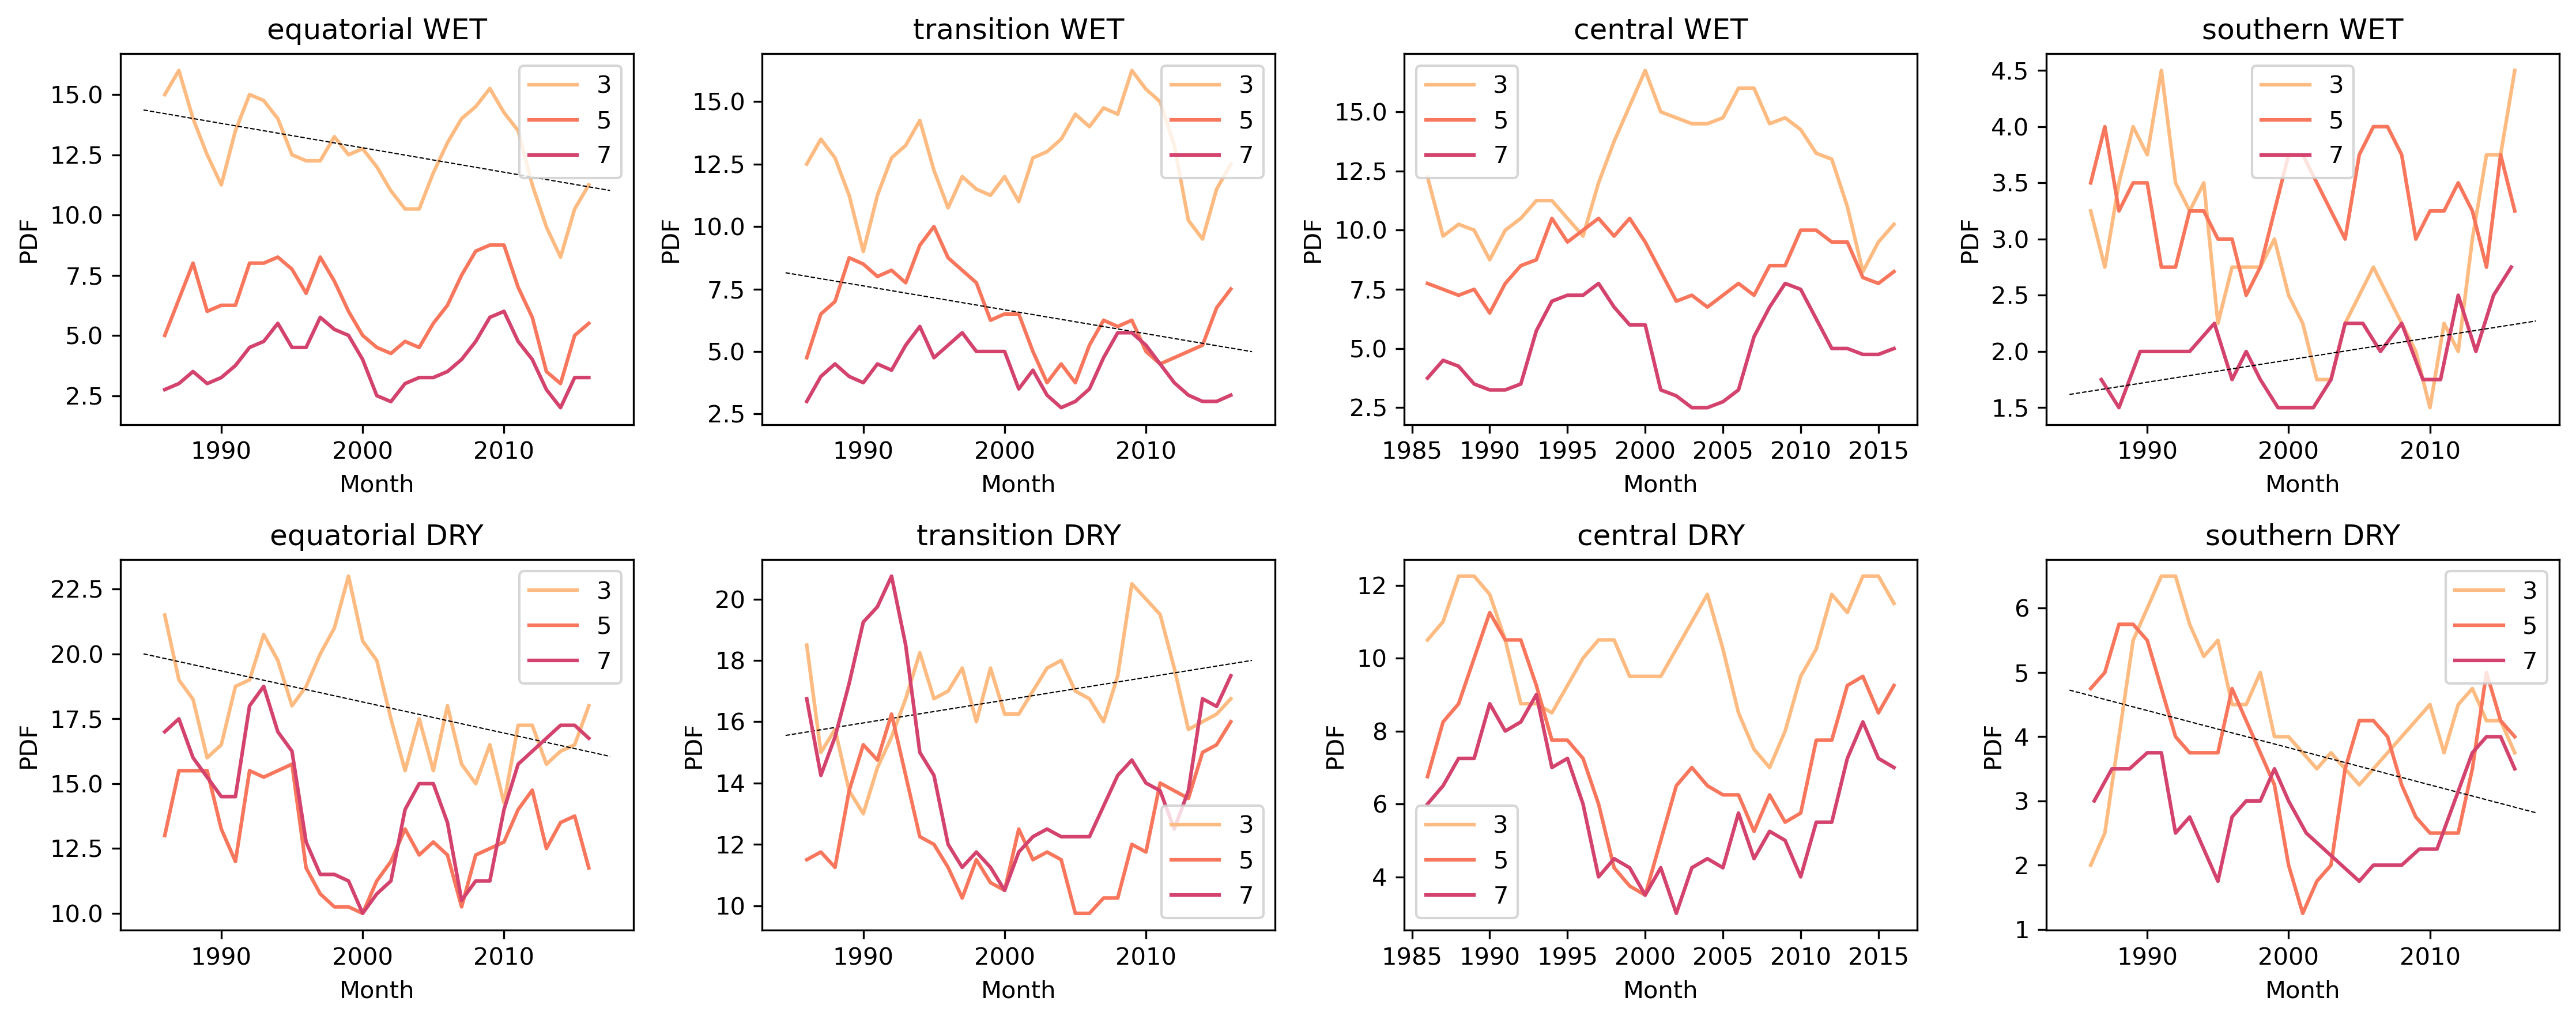

In [42]:
f = plt.figure(figsize=(15,6), dpi=300)
regs=['equatorial', 'transition', 'central','southern']
ids = 0

avg = 4

colors = sns.color_palette("magma_r")

for three, five, seven in zip(allreg_wet3, allreg_wet5, allreg_wet7):
  #  for ids, pr in enumerate(['equatorial', 'transition', 'central','southern']):
        print(ids)
        ax = f.add_subplot(2,4,ids+1)
        
        dy, dc = np.unique(three, return_counts=True)
        ax.plot(moving_average(dy-0.5,avg), moving_average(dc,avg),  color=colors[0], label='3')
        slope, inter, rval, pval, stderr = stats.linregress(moving_average(dy,avg), moving_average(dc,avg))
        #ipdb.set_trace()
        print(pval)
        if pval < 0.05:
            print('signif.')
            ax.plot(dy-0.5, inter+slope*(dy-0.5), color='k', linewidth=0.5, linestyle='dashed')


        dy5, dc5 = np.unique(five, return_counts=True)
        ax.plot(moving_average(dy5-0.5,avg), moving_average(dc5-dc,avg),  color=colors[1], label='5')
        slope, inter, rval, pval, stderr = stats.linregress(moving_average(dy5,avg), moving_average(dc5-dc,avg))
        print(pval)
        if pval < 0.05:
            print('signif.')
            ax.plot(dy-0.5, inter+slope*(dy-0.5), color='k', linewidth=0.5, linestyle='dashed')
        
        dy7, dc7 = np.unique(seven, return_counts=True)
        #ipdb.set_trace()

        ax.plot(moving_average(dy7-0.5,avg), moving_average(dc7,avg),  color=colors[2], label='7')

        slope, inter, rval, pval, stderr = stats.linregress(moving_average(dy7,avg), moving_average(dc7,avg))

        print(pval)
        if pval < 0.05:
            print('signif.')
            ax.plot(dy-0.5, inter+slope*(dy-0.5), color='k', linewidth=0.5, linestyle='dashed')

        ax.set_xlabel('Month')
        

        ax.set_ylabel('PDF')
        
        plt.title(regs[ids]+' WET')
        plt.legend()
        
        ids += 1
        
        
ids = 4      
for three, five, seven in zip(allreg_dry3, allreg_dry5, allreg_dry7):
  #  for ids, pr in enumerate(['equatorial', 'transition', 'central','southern']):
        print(ids)
        ax = f.add_subplot(2,4,ids+1)
        
        dy, dc = np.unique(three, return_counts=True)
        ax.plot(moving_average(dy-0.5,avg), moving_average(dc,avg),  color=colors[0], label='3')
        slope, inter, rval, pval, stderr = stats.linregress(moving_average(dy,avg), moving_average(dc,avg))
        #ipdb.set_trace()
        print(pval)
        if pval < 0.05:
            print('signif.')
            ax.plot(dy-0.5, inter+slope*(dy-0.5), color='k', linewidth=0.5, linestyle='dashed')


        dy5, dc5 = np.unique(five, return_counts=True)
        ax.plot(moving_average(dy5-0.5,avg), moving_average(dc5-dc,avg),  color=colors[1], label='5')
        slope, inter, rval, pval, stderr = stats.linregress(moving_average(dy5,avg), moving_average(dc5-dc,avg))
        print(pval)
        if pval < 0.05:
            print('signif.')
            ax.plot(dy-0.5, inter+slope*(dy-0.5), color='k', linewidth=0.5, linestyle='dashed')
        
        dy7, dc7 = np.unique(seven, return_counts=True)
        #ipdb.set_trace()

        ax.plot(moving_average(dy7-0.5,avg), moving_average(dc7,avg),  color=colors[2], label='7')

        slope, inter, rval, pval, stderr = stats.linregress(moving_average(dy7,avg), moving_average(dc7,avg))

        print(pval)
        if pval < 0.05:
            print('signif.')
            ax.plot(dy-0.5, inter+slope*(dy-0.5), color='k', linewidth=0.5, linestyle='dashed')

        ax.set_xlabel('Month')
        

        ax.set_ylabel('PDF')
        
        plt.title(regs[ids-4]+' DRY')
        plt.legend()
        
        ids += 1
plt.tight_layout()

In [27]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

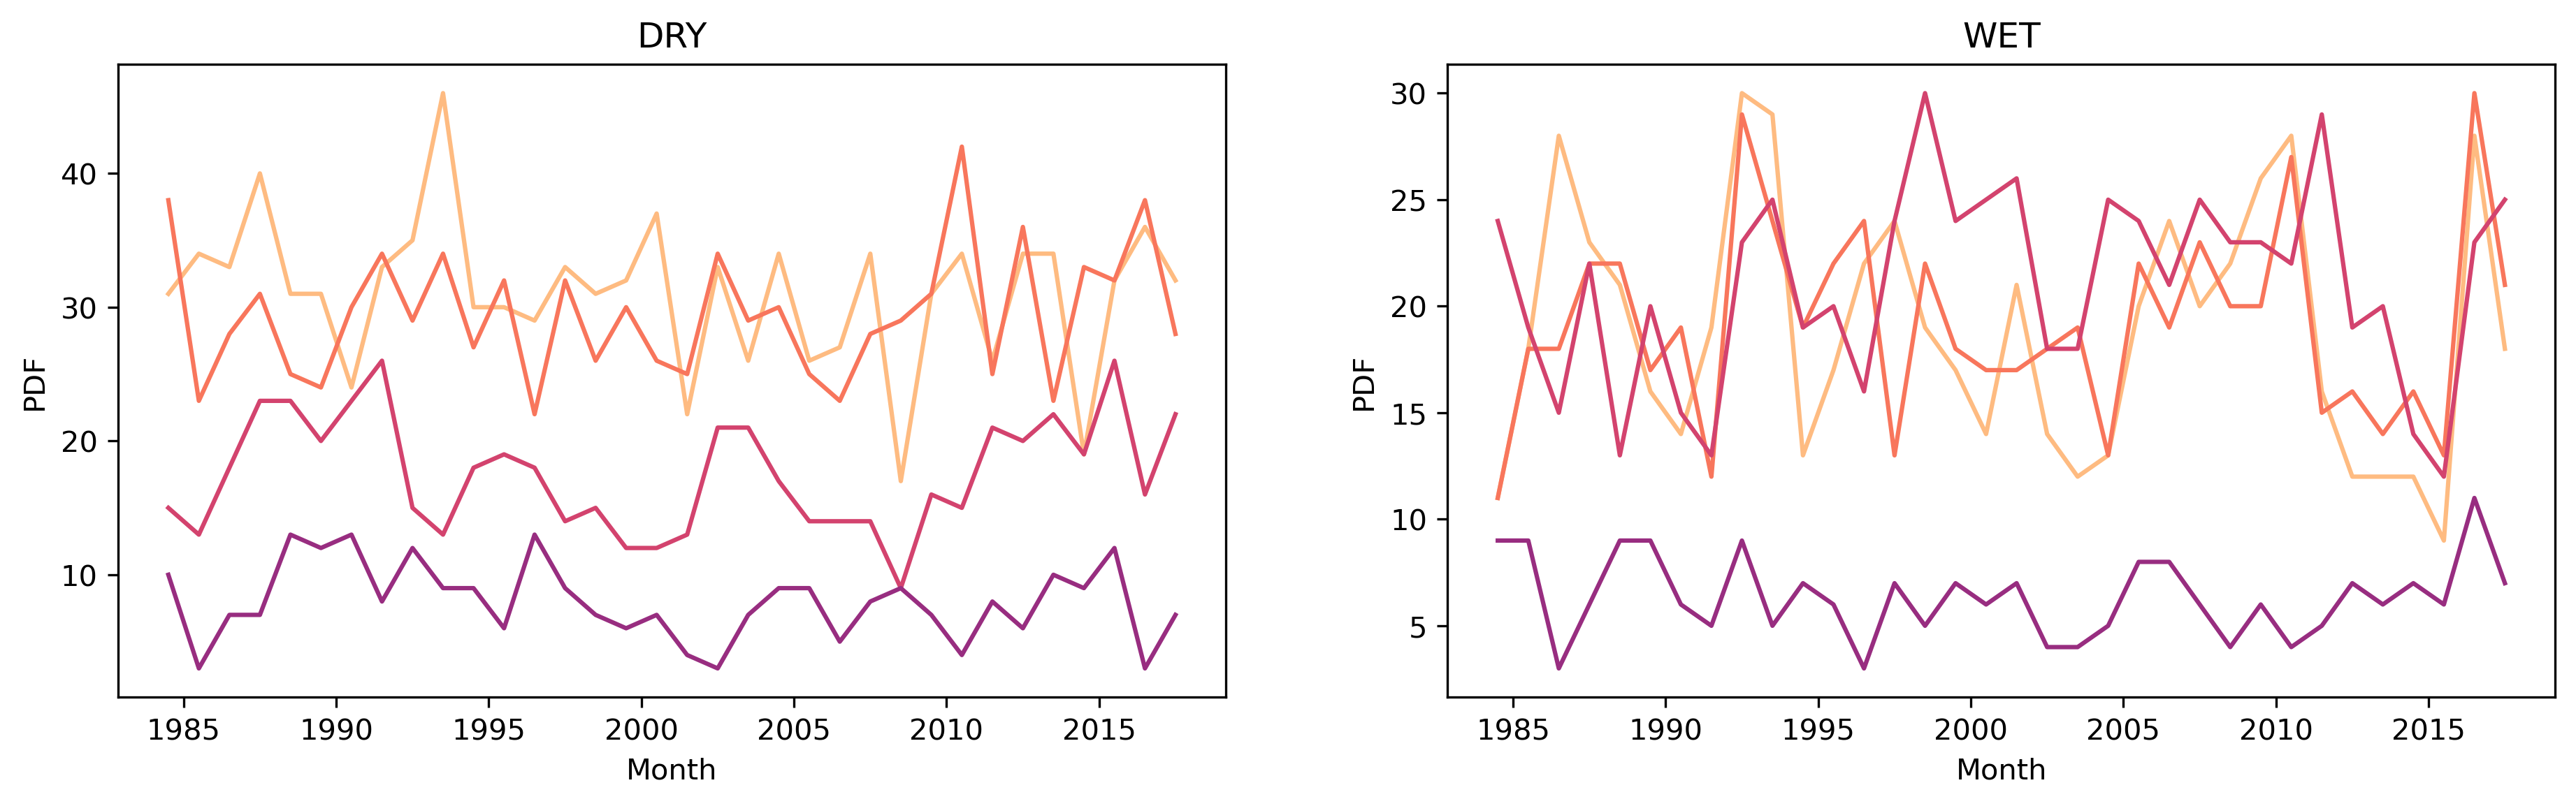

In [12]:
f = plt.figure(figsize=(15,4), dpi=300)
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
colors = sns.color_palette("magma_r") #[colord[0], colord[1], colord[2], colord[3]]
label = ['equatorial', 'transition', 'central','southern']

for ids, reg in enumerate(label):
    
    dy, dc = np.unique(allreg_dry[ids], return_counts=True)
    ax.plot(dy-0.5, dc,  color=colors[ids], label=label)
   # ax.legend()
    ax.set_title('DRY')
    
    wy, wc = np.unique(allreg_wet[ids], return_counts=True)
    ax1.plot(wy-0.5, wc,  color=colors[ids])
    ax1.set_title('WET')

    ax.set_xlabel('Month')
    ax1.set_xlabel('Month')

    ax.set_ylabel('PDF')
    ax1.set_ylabel('PDF')

LinregressResult(slope=0.44568372803666917, intercept=-867.8300993124521, rvalue=0.41167290307818505, pvalue=0.015562726476270035, stderr=0.1744118432984768)


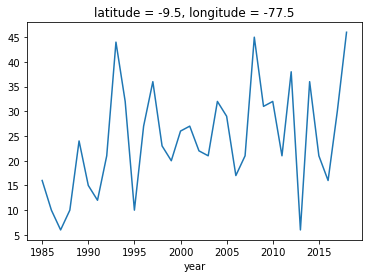

In [25]:
wt3 = wet_test3.where(wet_test3==5).sel(latitude=-9.5, longitude=-77.5, method='nearest').groupby('time.year').count()
print(stats.linregress(wt3.year, wt3))
wt3.plot()

LinregressResult(slope=-0.16883116883116886, intercept=354.0038197097021, rvalue=-0.15082092036477335, pvalue=0.3945356391069782, stderr=0.19562284403873087)


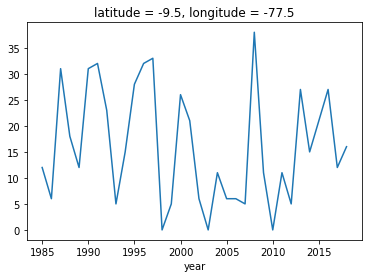

In [21]:
dt3 = dry_test3.where(dry_test3==5).sel(latitude=-9.5, longitude=-77.5, method='nearest').groupby('time.year').count()
print(stats.linregress(dt3.year, dt3))
dt3.plot()

In [51]:
central = pkl.load(open("/home/ck/DIR/cornkle/data/HUARAZ/saves/central_dw_spellDates_0.15perc_v2.p", "rb"))['wet5']
southern = pkl.load(open("/home/ck/DIR/cornkle/data/HUARAZ/saves/southern_dw_spellDates_0.15perc_v2.p", "rb"))['wet5']

In [58]:
ts = pd.date_range(start='2016-09-01', end='2016-12-31', freq='D')
boolsc = []
boolss = []
for tt in ts:
    boolsc.append(tt in central[central.year==2016])
    boolss.append(tt in southern[southern.year==2016])

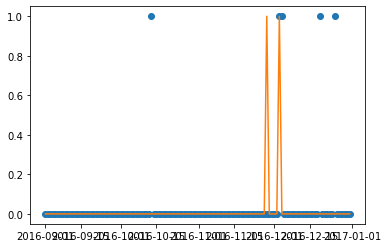

In [59]:
plt.plot(ts,boolsc, marker='o', linestyle='')
plt.plot(ts, boolss)